In [3]:
from tqdm import tqdm
import numpy as np
import os
import pandas as pd
from sklearn.datasets import make_blobs

# Data generation

In [2]:
root_synth = 'data/synthetic/'
os.makedirs(root_synth, exist_ok=True)

### With clusters

In [3]:
ADD_NOISE = True
N = 3000

np.random.seed(42)
for i,n_clust in tqdm(enumerate([2,3,4])):
    for j,dim in enumerate([53,96,180]):
        
        label = f'C{n_clust}_d_{dim}'

        # make data
        centers = np.pad(np.eye(n_clust), pad_width=((0,0),(0,dim - n_clust)))*2
        centers += np.random.randn(*centers.shape)*1
        X,y = make_blobs(n_samples=int(N*0.9), n_features=dim, centers=centers, cluster_std=0.5)
        if ADD_NOISE:
            X_ = X-X.mean(0)
            cov = (X_).T@X_/(X.shape[0]-1)
            cov_ = np.zeros_like(cov)
            cov_[np.diag_indices_from(cov)] = np.sqrt(cov[np.diag_indices_from(cov)])*2
            X_noise = np.random.multivariate_normal(X.mean(0), cov_, size=int(N*0.1))

            y_noise = np.zeros((int(N*0.1),))
            y_noise += max(y) + 1 # add separate class for the noise
            X = np.concatenate([X,X_noise])
            y = np.concatenate((y, y_noise))

        df = pd.DataFrame(X)
        df['target'] = y
        name = f'clust{n_clust}_dim{dim}'
        dataset_path = os.path.join(root_synth, name)
        df.to_csv(dataset_path)

3it [00:03,  1.32s/it]


### Without clusters

In [52]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from umap import UMAP
from matplotlib import pyplot as plt

In [58]:
pf_gen = PolynomialFeatures(degree=3, include_bias=False)
X = np.random.randn(3000,2)
X_poly = pf_gen.fit_transform(X)
dim = X_poly.shape[1]
W = np.random.randn(dim, dim)
W /= np.linalg.norm(W, axis=0, keepdims=True)
X_poly = X_poly@W

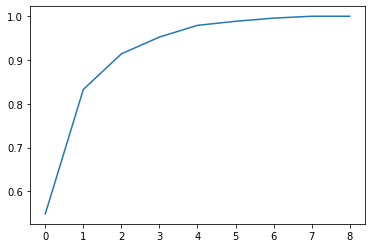

In [59]:
pca = PCA()
pca.fit(X_poly)
ev_cumsum = np.cumsum(pca.explained_variance_ratio_)
dim_pca = (np.arange(dim)[ev_cumsum > 0.99])[0]
plt.plot(ev_cumsum)

In [62]:
Z_pca = PCA(n_components=dim_pca, whiten=False).fit_transform(X_poly) #X_poly@(pca.components_[:6].T)
Z_umap = UMAP().fit_transform(Z_pca)

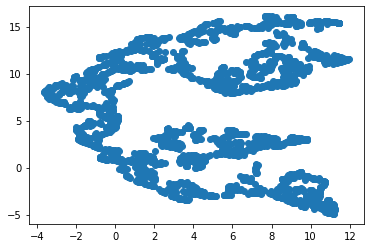

In [63]:
plt.scatter(Z_umap[:,0], Z_umap[:,1])

In [ ]:
# ADD_NOISE = True
# N = 3000
# N_trials = 10
# pf_gen = PolynomialFeatures(degree=3, include_bias=False)

# np.random.seed(42)
# for i,n_trial in tqdm(range(10)):
#     for j,dim in enumerate([53,96,180]):
        
#         label = f'C1_d_{dim}'
        
#         X = np.random.randn()
#         inpt_poly = pf_gen.fit_transform(X.T).T
#         W = np.random.randn(3,9)
#         W /= np.linalg.norm(W, axis=1, keepdims=True)
#         # Z = np.tanh(W@inpt_poly)
#         Z = W@inpt_poly

#         Z = StandardScaler().fit_transform(Z.T).T
        
#         df = pd.DataFrame(X)
#         df['target'] = np.zeros(N)
#         name = f'clust0_dim{dim}'
#         dataset_path = os.path.join(root_synth, name)
#         df.to_csv(dataset_path)